In [291]:
import numpy as np 
import pandas as pd

In [292]:
space_tits = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
space_tits.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [293]:
space_tits.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [294]:
space_tits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [295]:
space_tits.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Let us look at all features and what they entail:

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.


1. # One thing to notice is that when people(or aliens) are in cryosleep , their expenses in luxuries are 0

In [296]:
selected_columns = space_tits[(space_tits['CryoSleep'] == True) & (space_tits['Spa'] != 0) & (space_tits['ShoppingMall'] != 0)]
selected_columns

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [297]:
selected_columns = space_tits[(space_tits['CryoSleep'] == True)]
selected_columns.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False


In [298]:
null_cryosleep_rows = space_tits['CryoSleep'].isnull()
space_tits.loc[null_cryosleep_rows, ['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

In [299]:
manyzero = (space_tits['RoomService'] == 0) & (space_tits['FoodCourt'] == 0) & (space_tits['ShoppingMall'] == 0)
space_tits.loc[manyzero, 'CryoSleep'] = True
space_tits['CryoSleep'].fillna(False, inplace=True)

In [300]:
space_tits['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

We notice it is a balanced distribution. Phew! Made our work much easier ;)

In [301]:
space_tits['RoomService'].fillna(value=int(space_tits['RoomService'].mean()), inplace=True)
int(space_tits['RoomService'].mean())

219

In [302]:
space_tits['ShoppingMall'].fillna(value=int(space_tits['ShoppingMall'].mean()), inplace=True)
int(space_tits['ShoppingMall'].mean())

169

In [303]:
space_tits['FoodCourt'].fillna(value=int(space_tits['FoodCourt'].mean()), inplace=True)
int(space_tits['FoodCourt'].mean())

446

In [304]:
space_tits['VIP'].fillna(value=int(space_tits['VIP'].mode()), inplace=True)
int(space_tits['VIP'].mode())

0

In [305]:
import matplotlib.pyplot as plt

<Axes: >

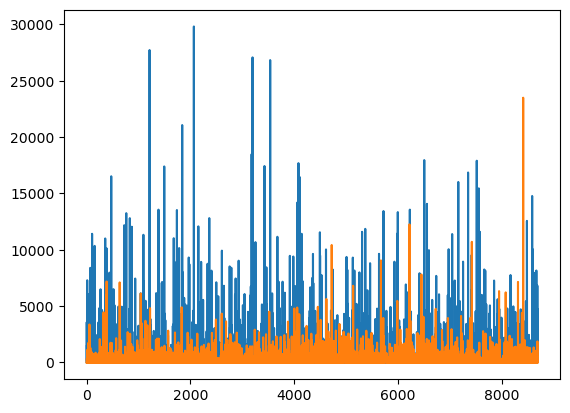

In [306]:
space_tits['FoodCourt'].plot()
space_tits['ShoppingMall'].plot()

In [307]:
space_tits.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             178
VRDeck          181
Name            200
Transported       0
dtype: int64

In [308]:
space_tits.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,True,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [309]:
selected_rows = space_tits[pd.isnull(space_tits['VRDeck'])]
selected_rows.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
115,0120_01,Mars,True,F/25/P,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,NaN,Bees Sacre,True
251,0278_01,Earth,True,NaN,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,888.0,NaN,Judya Beachez,False
288,0316_02,Europa,True,B/9/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,NaN,Beneba Sorbitter,True
290,0320_02,Earth,False,G/44/S,TRAPPIST-1e,21.0,False,0.0,5.0,3.0,0.0,NaN,Garley Bellarkerd,False


In [310]:
selected_rows = space_tits[(space_tits['FoodCourt'] == 0) & (space_tits['ShoppingMall'] == 0)]
selected_rows.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,True,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
19,0017_01,Earth,True,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True


Oh my! Surprisingly those which have FoodCourt, ShoppingMall 0 also have VRDeck 0 for most. Same for Spa!

In [311]:
selected_rows = space_tits[(space_tits['FoodCourt'] == 0) & (space_tits['ShoppingMall'] == 0) & (space_tits['VRDeck'].isnull())]
space_tits.loc[selected_rows.index, 'VRDeck'] = 0

In [312]:
space_tits.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             178
VRDeck          103
Name            200
Transported       0
dtype: int64

In [313]:
space_tits['VRDeck'].fillna(value=int(space_tits['VRDeck'].mean()), inplace=True)
int(space_tits['VRDeck'].mean())

294

In [314]:
space_tits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8515 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [315]:
from sklearn.feature_selection import mutual_info_classif
num_columns = space_tits[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
mean = num_columns.mean()
num_filled = num_columns.fillna(mean) 

In [316]:
mutual_info_classif(num_filled,space_tits['Transported'])

array([0.00830953, 0.07170862, 0.04381776, 0.04836526, 0.07045154,
       0.06013744])

Shockingly, there is no major relation between wealth-denoting features and the predictions. Truly, this is just a hypothetical situation.

In [317]:
space_tits['Destination'].value_counts()
#Since we have almost 180 NaN in Destination column, we can fill it with Mode

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [318]:
space_tits['Destination'].fillna(space_tits['Destination'].mode().iloc[0], inplace=True)

In [319]:
from sklearn.preprocessing import OneHotEncoder
clencoder = OneHotEncoder()
destination_column = space_tits['Destination'].values.reshape(-1, 1)

encoded_destination = clencoder.fit_transform(destination_column)
destination_encoded_df = pd.DataFrame(encoded_destination.toarray(), columns=clencoder.get_feature_names_out(['Destination']))

space_tits_encoded = pd.concat([space_tits, destination_encoded_df], axis=1)
space_tits_encoded.drop('Destination', axis=1, inplace=True)
space_tits = space_tits_encoded

In [320]:
space_tits.isnull().sum()

PassengerId                    0
HomePlanet                   201
CryoSleep                      0
Cabin                        199
Age                          179
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                          178
VRDeck                         0
Name                         200
Transported                    0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
dtype: int64

In [321]:
space_tits['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [322]:
space_tits['HomePlanet'].fillna(space_tits['HomePlanet'].mode().iloc[0], inplace=True)

In [323]:
destination_column = space_tits['HomePlanet'].values.reshape(-1, 1)

encoded_destination = clencoder.fit_transform(destination_column)
destination_encoded_df = pd.DataFrame(encoded_destination.toarray(), columns=clencoder.get_feature_names_out(['HomePlanet']))

space_tits_encoded = pd.concat([space_tits, destination_encoded_df], axis=1)
space_tits_encoded.drop('HomePlanet', axis=1, inplace=True)
space_tits = space_tits_encoded

In [324]:
space_tits.isnull().sum()

PassengerId                    0
CryoSleep                      0
Cabin                        199
Age                          179
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                          178
VRDeck                         0
Name                         200
Transported                    0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
dtype: int64

In [325]:
space_tits['CryoSleep'].value_counts()

False    4779
True     3914
Name: CryoSleep, dtype: int64

<Axes: >

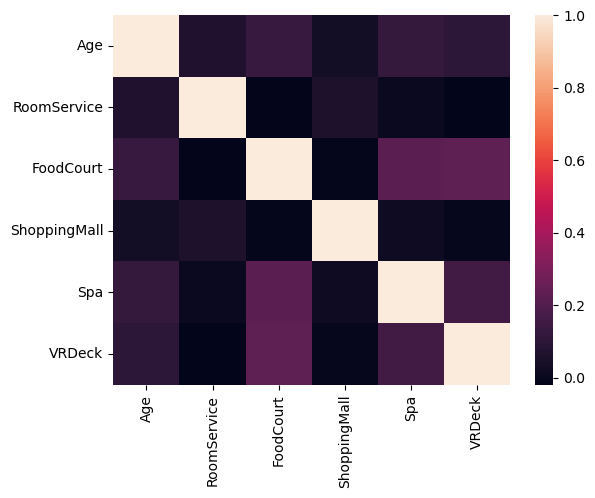

In [326]:
import seaborn as sns
sns.heatmap(num_columns.corr())

In [327]:
space_tits['Name'] = space_tits['Name'].replace(np.nan, '')

In [328]:
space_tits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   object 
 2   Cabin                      8494 non-null   object 
 3   Age                        8514 non-null   float64
 4   VIP                        8693 non-null   object 
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8515 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Name                       8693 non-null   object 
 11  Transported                8693 non-null   bool   
 12  Destination_55 Cancri e    8693 non-null   float64
 13  Destination_PSO J318.5-22  8693 non-null   float

In [329]:
space_tits.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,True,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.0,1.0,0.0,1.0,0.0
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0.0,0.0,1.0,1.0,0.0,0.0
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0.0,0.0,1.0,0.0,1.0,0.0
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0.0,0.0,1.0,0.0,1.0,0.0
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0.0,0.0,1.0,1.0,0.0,0.0


In [330]:
space_tits['Spa'].fillna(value=int(space_tits['Spa'].mean()), inplace=True)
int(space_tits['Spa'].mean())

304

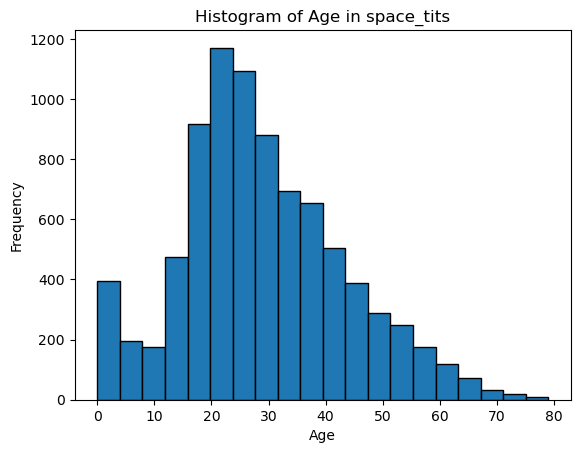

In [331]:
plt.hist(space_tits['Age'], bins=20, edgecolor='black')  # You can adjust the number of bins as per your preference
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age in space_tits')
plt.show()

In [332]:
space_tits['Age'].fillna(value=int(space_tits['Age'].mean()), inplace=True)
int(space_tits['Age'].mean())

28

In [333]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
space_tits['Transported'] = encoder.fit_transform(space_tits['Transported'])
space_tits['CryoSleep'] = encoder.fit_transform(space_tits['CryoSleep'])
space_tits['VIP'] = encoder.fit_transform(space_tits['VIP'])

In [334]:
X = space_tits.drop(columns=['PassengerId','Transported','Cabin','Name'])
Y = space_tits['Transported']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y)


In [335]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [336]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[-0.90305174,  0.28843135, -0.15170881, ..., -1.1102213 ,
        -0.56657428,  1.96982857],
       [-0.90305174,  0.91447445, -0.15170881, ...,  0.90072133,
        -0.56657428, -0.50765839],
       [-0.90305174,  0.49711238, -0.15170881, ..., -1.1102213 ,
         1.76499363, -0.50765839],
       ...,
       [ 1.10735627, -1.79837898, -0.15170881, ..., -1.1102213 ,
        -0.56657428,  1.96982857],
       [-0.90305174, -0.68541347, -0.15170881, ..., -1.1102213 ,
         1.76499363, -0.50765839],
       [-0.90305174, -1.10277553, -0.15170881, ...,  0.90072133,
        -0.56657428, -0.50765839]])

In [337]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [338]:
X_train_pred=xgb_cl.predict(X_train)
Accu_train=accuracy_score(X_train_pred,Y_train)
print(Accu_train)
X_test_pred=xgb_cl.predict(X_test)
Accu_test=accuracy_score(X_test_pred,Y_test)
print(Accu_test)

0.8653969065575866
0.7781609195402299


In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
models=[LogisticRegression( max_iter=3000),SVC()]
for model in models:
  model.fit(X_train,Y_train)
  X_train_pred=model.predict(X_train)
  Accu_train=accuracy_score(X_train_pred,Y_train)
  print(Accu_train)
  X_test_pred=model.predict(X_test)
  Accu_test=accuracy_score(X_test_pred,Y_test)
  print(Accu_test)

0.7789850441007287
0.7827586206896552
0.7834590310622523
0.7735632183908046


In [340]:
for_cl = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=3)
for_cl.fit(X_train,Y_train)

X_train_pred=for_cl.predict(X_train)
Accu_train=accuracy_score(X_train_pred,Y_train)
print(Accu_train)
X_test_pred=for_cl.predict(X_test)
Accu_test=accuracy_score(X_test_pred,Y_test)
print(Accu_test)

0.8265371340917806
0.7862068965517242


Since XGBoost and RFClassifier are giving best accuracies, we will use them only

In [341]:
space_tits = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
space_tits.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [342]:
null_cryosleep_rows = space_tits['CryoSleep'].isnull()
space_tits.loc[null_cryosleep_rows, ['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
manyzero = (space_tits['RoomService'] == 0) & (space_tits['FoodCourt'] == 0) & (space_tits['ShoppingMall'] == 0)
space_tits.loc[manyzero, 'CryoSleep'] = True
space_tits['CryoSleep'].fillna(False, inplace=True)
space_tits['RoomService'].fillna(value=219, inplace=True)
space_tits['ShoppingMall'].fillna(value=169, inplace=True)
space_tits['VIP'].fillna(value=0, inplace=True)
space_tits['VRDeck'].fillna(value=294, inplace=True)

space_tits['FoodCourt'].fillna(value=446, inplace=True)

space_tits['VIP'] = encoder.fit_transform(space_tits['VIP'])


selected_rows = space_tits[(space_tits['FoodCourt'] == 0) & (space_tits['ShoppingMall'] == 0) & (space_tits['VRDeck'].isnull())]
space_tits.loc[selected_rows.index, 'VRDeck'] = 0

In [343]:
space_tits.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep         0
Cabin           100
Destination      92
Age              91
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa              99
VRDeck            0
Name             94
dtype: int64

In [344]:
space_tits['Destination'].mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

In [345]:
space_tits['Destination'].fillna(space_tits['Destination'].mode().iloc[0], inplace=True)

In [346]:
destination_column = space_tits['Destination'].values.reshape(-1, 1)

encoded_destination = clencoder.fit_transform(destination_column)
destination_encoded_df = pd.DataFrame(encoded_destination.toarray(), columns=clencoder.get_feature_names_out(['Destination']))

space_tits_encoded = pd.concat([space_tits, destination_encoded_df], axis=1)
space_tits_encoded.drop('Destination', axis=1, inplace=True)
space_tits = space_tits_encoded

In [347]:
space_tits.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,Earth,True,G/3/S,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,0.0,1.0
1,0018_01,Earth,False,F/4/S,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0.0,0.0,1.0
2,0019_01,Europa,True,C/0/S,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0.0,0.0,1.0
4,0023_01,Earth,False,F/5/S,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0.0,0.0,1.0


In [348]:
space_tits['HomePlanet'].fillna(space_tits['HomePlanet'].mode().iloc[0], inplace=True)
space_tits['Age'].fillna(value=28, inplace=True)
destination_column = space_tits['HomePlanet'].values.reshape(-1, 1)

encoded_destination = clencoder.fit_transform(destination_column)
destination_encoded_df = pd.DataFrame(encoded_destination.toarray(), columns=clencoder.get_feature_names_out(['HomePlanet']))

space_tits_encoded = pd.concat([space_tits, destination_encoded_df], axis=1)
space_tits_encoded.drop('HomePlanet', axis=1, inplace=True)
space_tits = space_tits_encoded
space_tits['Name'] = space_tits['Name'].replace(np.nan, '')
space_tits['Spa'].fillna(value=304, inplace=True)


In [349]:
space_tits['CryoSleep'] = encoder.fit_transform(space_tits['CryoSleep'])
space_tits['VIP'] = encoder.fit_transform(space_tits['VIP'])

In [350]:
X_test = space_tits.drop(columns=['PassengerId','Cabin','Name'])
X_test_pred=xgb_cl.predict(X_test)
X_test_pred_2=for_cl.predict(X_test)

In [351]:
x = 0
for i in range(len(X_test_pred)):
    if X_test_pred[i] == X_test_pred_2[i]:
        x=x+1
x, i

(3992, 4276)

In [352]:
submission = pd.DataFrame({
    'PassengerId': space_tits['PassengerId'],
    'Transported': X_test_pred
})

In [353]:
submission['Transported'] = submission['Transported'].astype(bool)

In [354]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [356]:
submission.to_csv('submission(1).csv',index=False)


In [358]:
submission_2 = pd.DataFrame({
    'PassengerId': space_tits['PassengerId'],
    'Transported': X_test_pred_2
})

In [359]:
submission_2['Transported'] = submission_2['Transported'].astype(bool)

In [360]:
submission_2.to_csv('submission(2).csv',index=False)